In [66]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* CAD/JPY exchange rate returns. 

In [67]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [68]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Data Preparation

### Returns

In [69]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!
cad_jpy_df['Return'] = (cad_jpy_df[["Price"]].pct_change() * 100)
cad_jpy_df = cad_jpy_df.replace(-np.inf, np.nan).dropna()
cad_jpy_df.head()

,Price,Open,High,Low,Return
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901


### Lagged Returns 

In [70]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
cad_jpy_df['Lagged_Return']=cad_jpy_df['Return'].shift(1)
cad_jpy_df=cad_jpy_df.dropna()
cad_jpy_df.tail()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697,-0.114913
2020-06-01,79.27,78.21,79.36,78.04,1.251756,0.076697
2020-06-02,80.40,79.26,80.56,79.15,1.425508,1.251756
2020-06-03,80.70,80.40,80.82,79.96,0.373134,1.425508
2020-06-04,80.71,80.80,80.89,80.51,0.012392,0.373134


### Train Test Split

In [71]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df[:'2017']
test = cad_jpy_df['2018':]

In [72]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
X_train=train[['Lagged_Return']]
Y_train=train[['Return']]
X_test=test[['Lagged_Return']]
Y_test=test[['Return']]

In [73]:
# Preview the X_train data
# YOUR CODE HERE!

X_train

,Lagged_Return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901
...,...
2017-12-25,-0.011240
2017-12-26,0.033723
2017-12-27,0.269693


# Linear Regression Model

In [74]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
# YOUR CODE HERE!
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# Make predictions using the Testing Data

**Note:** We want to evaluate the model using data that it has never seen before, in this case: `X_test`.

In [75]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!
y_hat=model.predict(X_test)

In [76]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!

compare=Y_test.copy()
compare['Return_pred']=y_hat
compare.head()

,Return,Return_pred
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317
2018-01-03,0.011142,0.000340
2018-01-04,0.601604,-0.001358
2018-01-05,0.919158,-0.016366


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

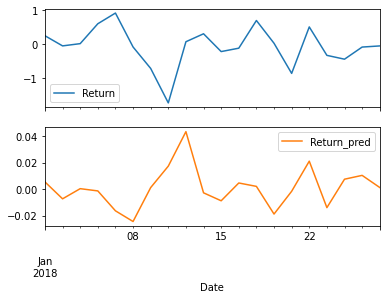

In [77]:
# Plot the first 20 predictions vs the true values
# YOUR CODE HERE!
compare.iloc[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (`X_test` and `y_test`)

In [78]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)
# YOUR CODE HERE!
return_mse=mean_squared_error(compare['Return'],compare['Return_pred'])
return_mse

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!
return_rmse=np.sqrt(return_mse)
return_rmse

0.6445805658569028

# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [80]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
in_sample=Y_train.copy()
# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
y_hat_insample=model.predict(X_train)
in_sample['Return_pred']=y_hat_insample
in_sample

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
return_mse_insample=mean_squared_error(in_sample['Return'],in_sample['Return_pred'])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
return_rmse_insample=np.sqrt(return_mse_insample)
return_rmse_insample

0.841994632894117

# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

**Answer:** This model performs better on out-of-sample data as its RMSE (test dataset) is lower than its in-sample RMSE (train dataset), which suggest the model could be underfitting.